# Quantum Hardware lecture (Summer of 2024)
Prof. Tobias Schaetz (https://www.qsim.uni-freiburg.de/)

## Exercise sheet 2 (22. April 2024 - 29. April 2024)

*Fill in your names (work in teams of up to two students):*

1.   **Benedikt Bettin**
2.   **_________________**

For questions contact Lucas Weitzel (email: lucas.weitzel@physik.uni-freiburg.de).

You can upload your results on [ILIAS](https://ilias.uni-freiburg.de/goto.php?target=exc_2603354&client_id=unifreiburg) or send them to the email above.

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

## Professor's Questions Corner
Typically, two questions about the lectures of the week – to be answered in keywords and discussed during the tutorials.


---
### **I)** Question I
---

How can we experimentally derive the temporal evolution of a superposition state (given that we know, after a measurement, the state remains projected)?

If the interaction time is $\frac{\pi }{\Omega}$, i. e. a Pi-pulsem, the system stays in superposition, if it was a superposition state to begin with. The Pi-pulse rotatest the state on the Bloch Sphere by 180 degrees.

---
### **II)** Question II
---

How can we distinguish experimentally between a (partially) mixed state and a (near pure) superposition state (how do their dynamics change, pictured with the Bloch-sphere)?



A perfectly mixed state would be represented by a dot in the middle of the Bloch Sphere, even a partially mixed state does not "reach" the surface of the Bloch sphere. A superposition on the other hand would be right on the equatorial plane, reaching the surface. By applying a $t_{int}=\frac{\pi / 2 }{\Omega}$ Pulse, the superposition would become a pure state (either up or down, depending on the superposition), while applying $t_{int}=\frac{\pi/2 }{\Omega}$ to a mixed state would not change its representation on the Bloch Sphere

## Pen on paper tasks
Of course, you may also type on your computer.

---
### **III)** Hyperfine vs. optical qubits in $Ca^+$
---
Sketch (not to scale) the level diagram of $^{43}Ca^+$ and include the lowest lying S, D, and P levels. Please include the hyperfine structure and label relative energy level differences using your favourite units. Qubits are, e.g., encoded in two hyperfine states of the $S_{1/2}$ ground state manifold (hyperfine qubits), or in one $S_{1/2}$ and one $D_{5/2}$ state (optical qubits).

1.   What kind of couplings are required to drive these qubits?
2.   What limitations on T1 times would you expect? 
3. Compare this with an electric-dipole transition, linking, e.g., two levels in $S_{1/2}$ and $P_{3/2}$. Such a transition is typically used for Doppler cooling and fluorescence detection. Why are such levels not used as a qubits?

---

## Programming (Simulation)
Typically done in Python using [Qutip](https://qutip.org/)

---
### **IV)** Pure and mixed states
---

Demonstrate your answer to Prof's 
Question **II)** using ```QuTiP```, for example by preparing, operating on, and measuring different states. You may wish to also plot on the Bloch sphere to explain your answer.

(array([519.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 481.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

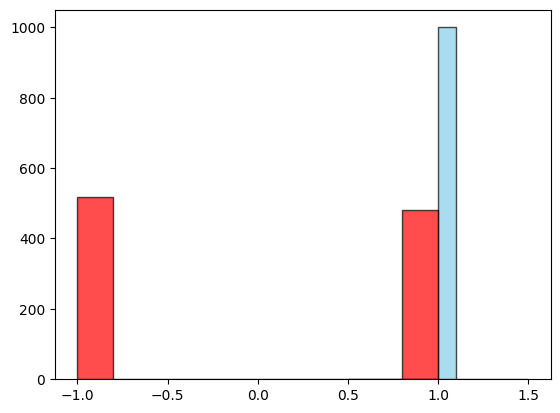

In [37]:

import numpy as np
import qutip as qt
import scipy as sp
from qutip import *
from IPython.display import Image
from qutip import (Qobj, about, basis, coherent, coherent_dm, create, destroy,
                   expect, fock, fock_dm, mesolve, qeye, sigmax, sigmay,
                   sigmaz, tensor, thermal_dm, anim_matrix_histogram,
                   anim_fock_distribution)
from qutip.measurement import (measure, measurement_statistics)

import numpy as np
import matplotlib.pyplot as plt


measurements_results_superpositon=[]
for i in range(1000):
    # Define the quantum state |psi>
    psi = psi = (basis(2, 0) + basis(2, 1)).unit()
        
    # Define the sigma_x operator for measurement
    sigma_x = qt.sigmax()
        
    result, state= measure(psi ,sigma_x)
    measurements_results_superpositon.append(result)


plt.hist(measurements_results_superpositon, bins=10, color='skyblue', edgecolor='black', alpha=0.7,)  


measurements_results_mixed=[]
def random_mixed_state(dim=2):
    rho = rand_dm(dim, density=0.75)  # Density matrix for a mixed state
    return rho
for i in range(1000):
    
    result_mixed, state= measure( random_mixed_state(),sigma_x)
    measurements_results_mixed.append(result_mixed)


plt.hist(measurements_results_mixed, bins=10, color='red', edgecolor='black', alpha=0.7,)  





Here we can see that the mixed states in the z-Basis will roughly split up 50/50 into up or down in the x-Basis. The superposition on the other hand will 100% be spin up.

---
### **V)** Two-level system dynamics
---

A two-level atom coupled by a laser has the Hamiltonian

$H = \frac{\Delta}{2}\sigma_z + \frac{\Omega}{2}\sigma_x$,

where $\Delta = \omega_{\mathrm{atom}} - \omega_{\mathrm{laser}}$ is the detuning of the laser from the atomic transition and $\Omega$ is an effective Rabi rate. Here we have used $\hbar=1$ and the rotating wave approximation, and we are in a reference frame which rotates at the laser frequency. This allows us to remove the time-dependence of the Hamiltonian without affecting our results.

Tasks:


1.   Using ```QuTiP```'s ```mesolve``` function, plot the population of the ground and excited states as a function of time for a few values of $\Delta$ and $\Omega$ for an atom initially in the ground state.
2.   Using one set of parameters you chose in part 1, plot the state of the system over time on [Bloch sphere](https://qutip.org/docs/latest/guide/guide-bloch.html).
3.   Decay from the excited state to the ground state through spontaneous emission can be described by the collapse operator $\sqrt\gamma\sigma^-$, where $\gamma$ is the spontaneous decay rate and $\sigma^-$ is the atomic lowering operator. Repeat part 1. with $\gamma = 0.1$.
4. Repeat part 2. with $\gamma = 0.1$.

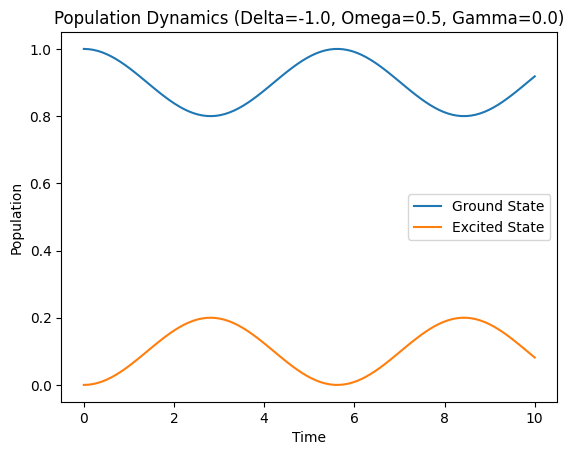

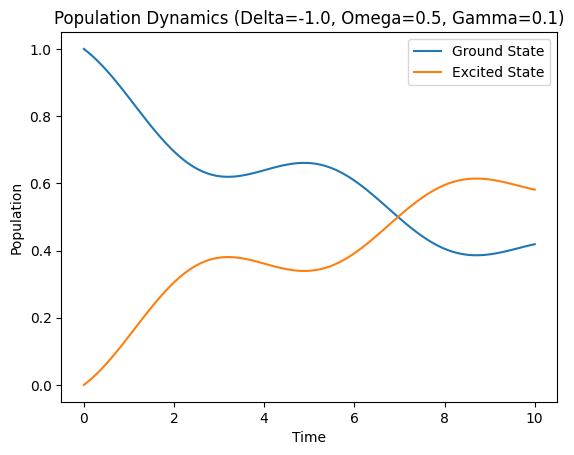

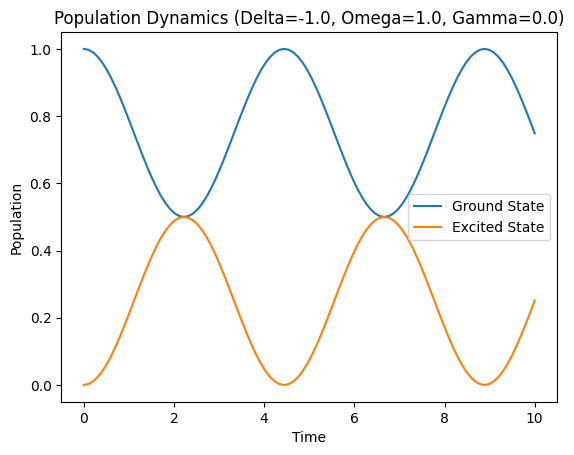

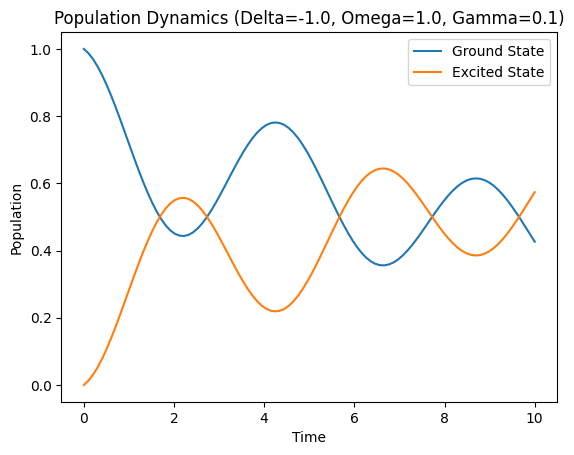

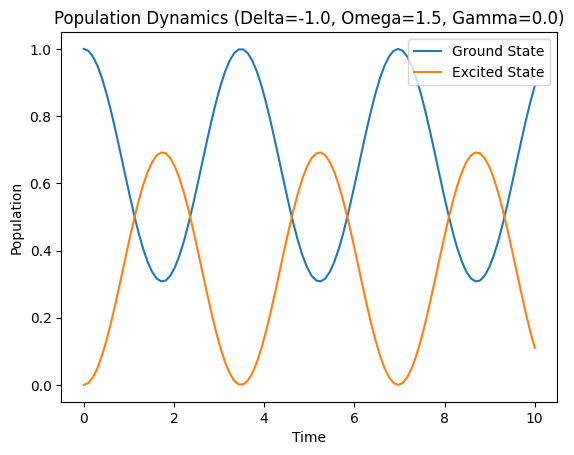

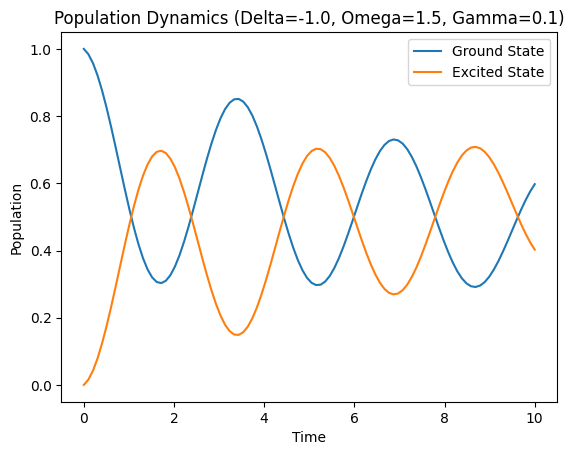

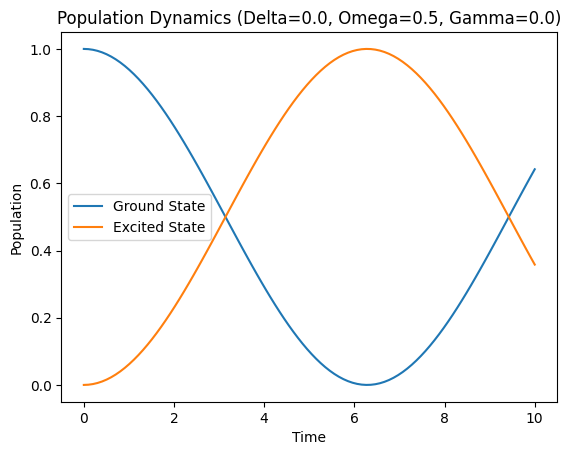

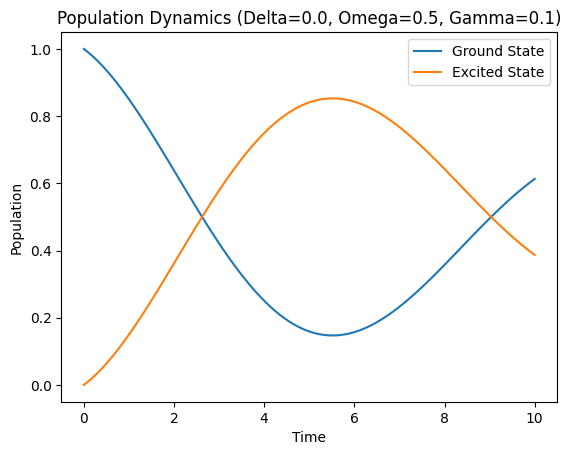

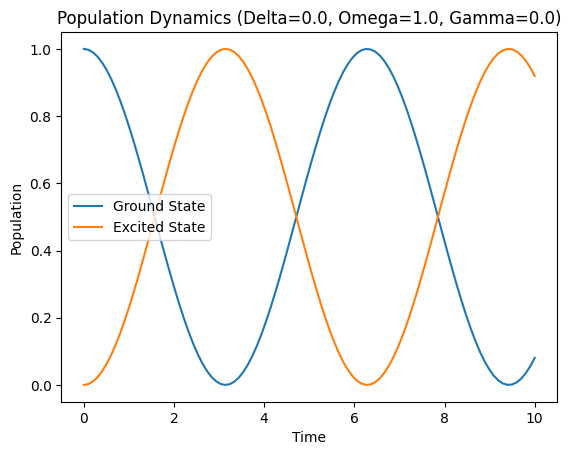

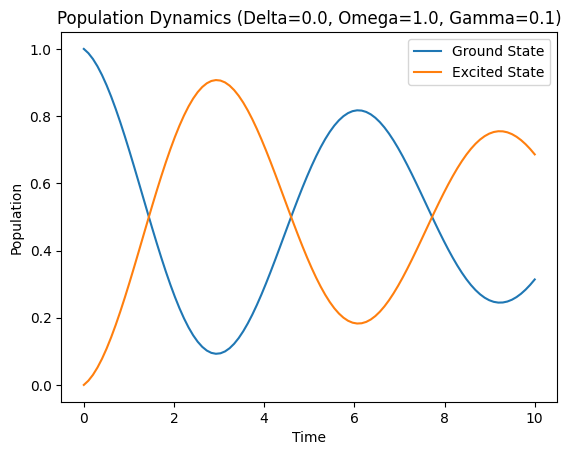

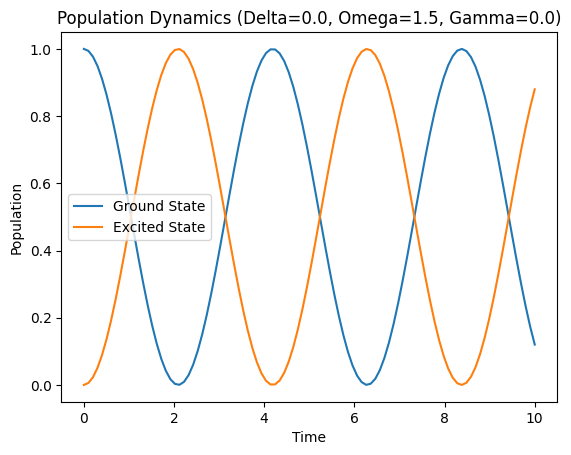

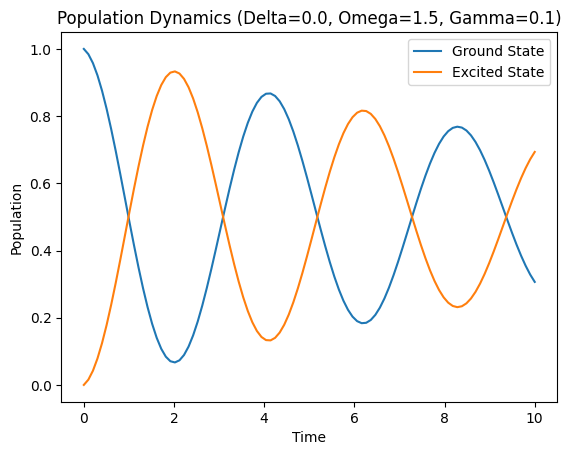

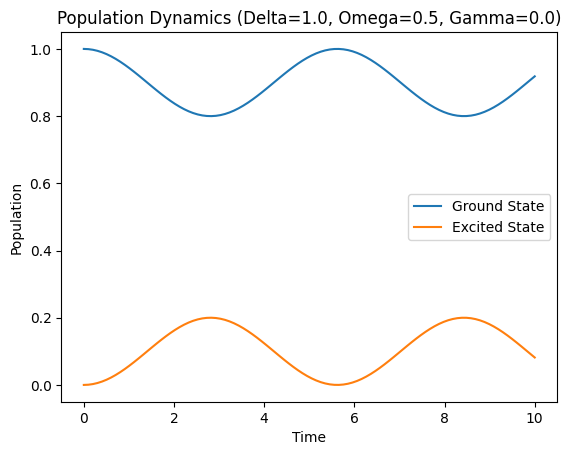

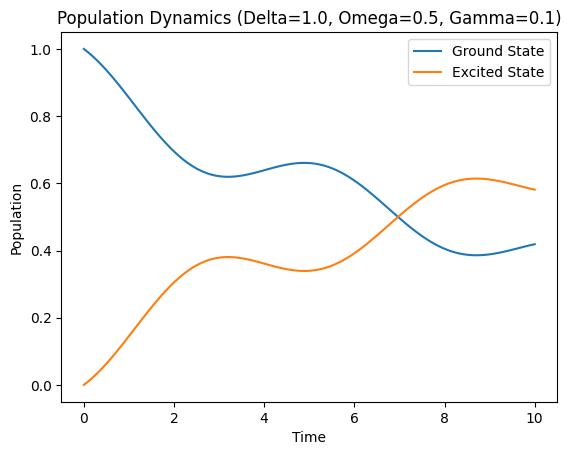

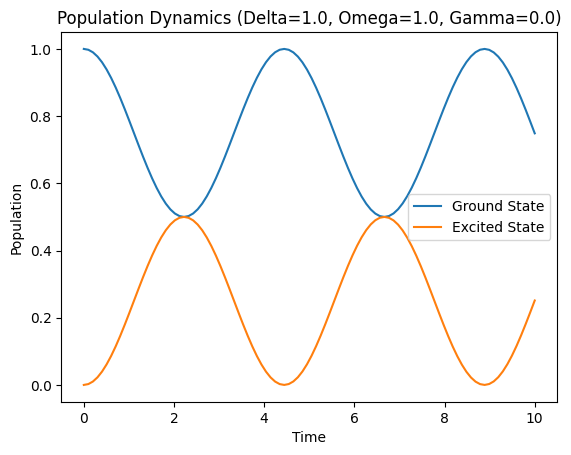

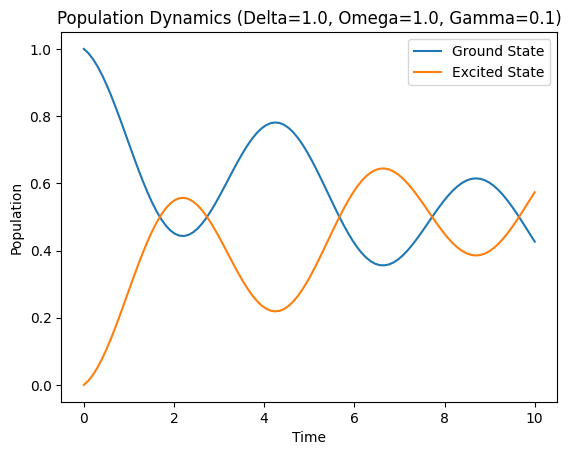

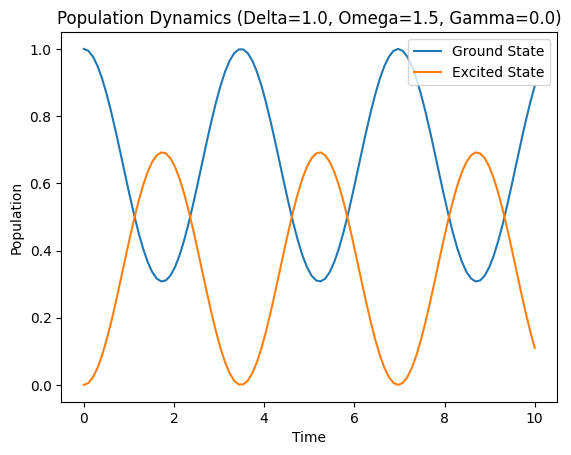

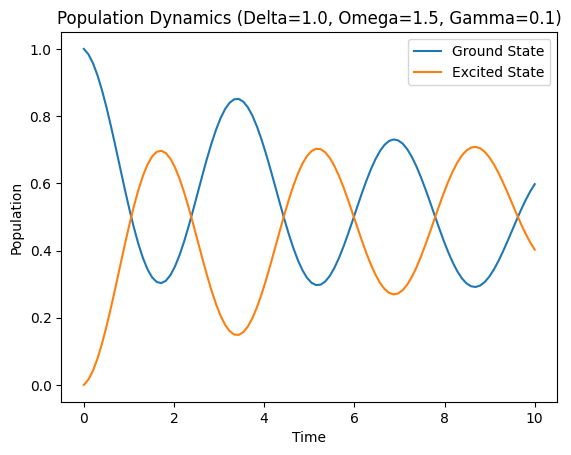

In [38]:

from scipy.constants import pi

# Parameters
Delta_values = [-1.0, 0.0, 1.0]  
Omega_values = [0.5, 1.0, 1.5]    
gamma = 0.1                      


sigma_z = sigmaz()
sigma_x = sigmax()
sigma_minus = sigmam()

psi0 = basis(2, 0) # ground state


t = np.linspace(0, 10, 100)  #time for mesolve function


def plot_population_dynamics(Delta, Omega, gamma=0.0):
    H = 0.5 * Delta * sigma_z + 0.5 * Omega * sigma_x

    # Collapse operator for spontaneous emission
    c_ops = []
    if gamma > 0.0:
        c_ops.append(np.sqrt(gamma) * sigma_minus)

    # Solve the master equation
    result = mesolve(H, psi0, t, c_ops)

    # Calculate populations
    pop_ground = expect(basis(2, 0) * basis(2, 0).dag(), result.states)
    pop_excited = expect(basis(2, 1) * basis(2, 1).dag(), result.states)

    # Plot results
    plt.plot(t, pop_ground, label="Ground State")
    plt.plot(t, pop_excited, label="Excited State")
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title(f"Population Dynamics (Delta={Delta}, Omega={Omega}, Gamma={gamma})")
    plt.legend()
    plt.show()


for Delta in Delta_values:
    for Omega in Omega_values:
        plot_population_dynamics(Delta, Omega, gamma=0.0)  # no spontaneous emission
        plot_population_dynamics(Delta, Omega, gamma=gamma)  # spontaneous emission


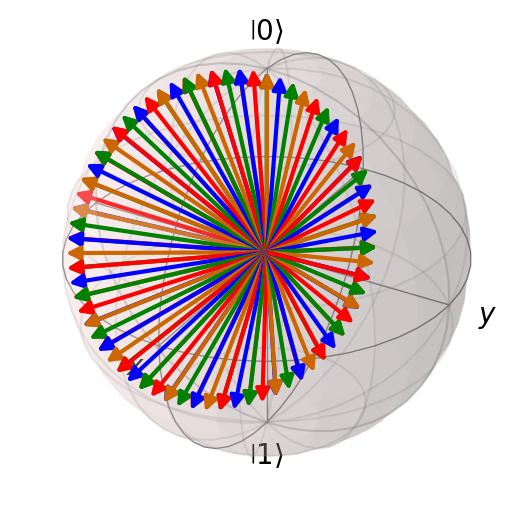

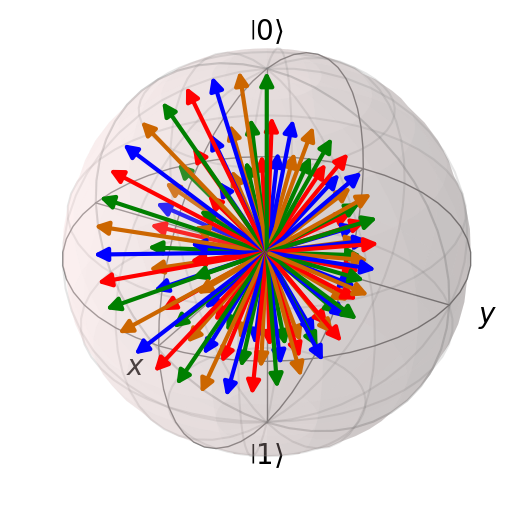

In [40]:
def plot_bloch_sphere(Delta, Omega, gamma=0.0):
    H = 0.5 * Delta * sigma_z + 0.5 * Omega * sigma_x

    # Collapse operator for spontaneous emission from previous part
    c_ops = []
    if gamma > 0.0:
        c_ops.append(np.sqrt(gamma) * sigma_minus)


    result = mesolve(H, psi0, t, c_ops)

    # Bloch sphere evolution
    bloch = Bloch()
    bloch.add_states(result.states)
    bloch.show()


Delta_plot = 1.0
Omega_plot = 1.5


plot_bloch_sphere(Delta_plot, Omega_plot, gamma=0.0)  # Without spontaneous emission
plot_bloch_sphere(Delta_plot, Omega_plot, gamma=gamma)  # With spontaneous emission
